In [1]:
# Importing necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import silhouette_score

In [2]:
# Step 1: Load and preprocess the dataset
# Load the dataset
data = pd.read_csv('Dataset (ATS)-1.csv')

In [3]:
data.isna().sum()

gender             0
SeniorCitizen      0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
Contract           0
MonthlyCharges     0
Churn              0
dtype: int64

In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   object 
 1   SeniorCitizen    7043 non-null   int64  
 2   Dependents       7043 non-null   object 
 3   tenure           7043 non-null   int64  
 4   PhoneService     7043 non-null   object 
 5   MultipleLines    7043 non-null   object 
 6   InternetService  7043 non-null   object 
 7   Contract         7043 non-null   object 
 8   MonthlyCharges   7043 non-null   float64
 9   Churn            7043 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 550.4+ KB


In [6]:
# Handle missing data by filling missing values with the forward fill method
data.fillna(method='ffill', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_22176\840782216.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [7]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = ['gender','Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract', 'Churn']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [8]:
# Perform feature scaling and normalization on numerical columns
scaler = StandardScaler()
numerical_cols = ['MonthlyCharges', 'tenure']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [9]:
# Ensure data integrity by checking for any remaining missing or inconsistent values
assert data.isnull().sum().sum() == 0, "Data contains missing values"


In [10]:
# Step 2: Clustering Analysis (Customer Segmentation)
# Split the dataset into features (X) and the target variable (y)
X = data.drop(['Churn'], axis=1)
y = data['Churn']

In [11]:
# Use K-Means Clustering to segment customers
# Determine the optimal number of clusters using the Elbow Method
sse = []  # Sum of Squared Errors
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

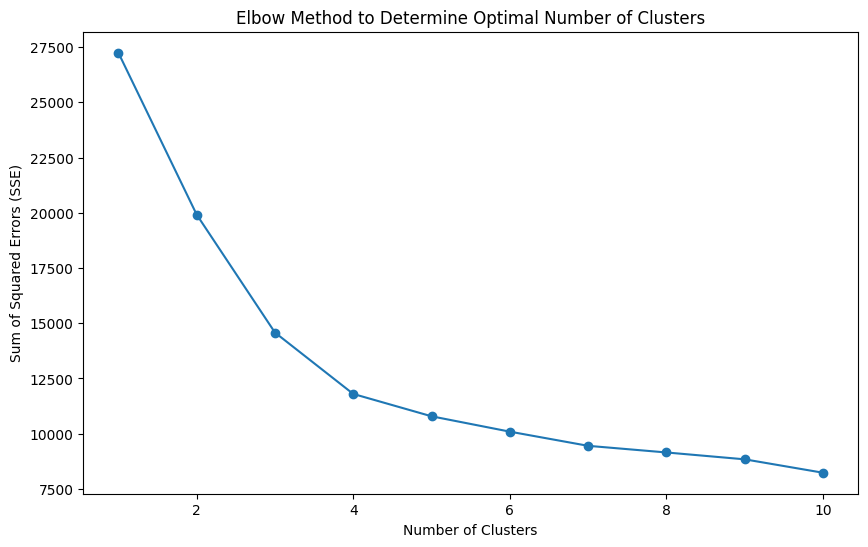

In [12]:
# Plot the elbow graph to visualize the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [13]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

In [14]:
# Calculate the silhouette score to evaluate clustering performance
sil_score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.27321802209278434


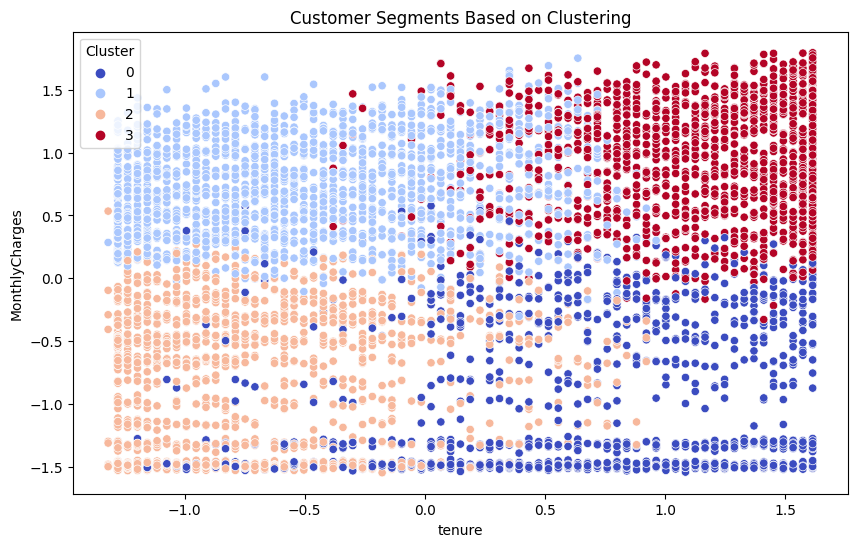

In [15]:
# Visualize clusters based on 'tenure' and 'MonthlyCharges'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Cluster', data=data, palette='coolwarm')
plt.title('Customer Segments Based on Clustering')
plt.show()

In [16]:
# Step 3: Predictive Modeling (Churn Prediction using ANN)
# Split the data into training and testing sets for the predictive model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Define the architecture of the Artificial Neural Network (ANN) model
ann_model = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=500, activation='relu', solver='adam', random_state=42)


In [29]:
# Display the model architecture
print("Defined Architecture of ANN Model:")
print(ann_model)

Defined Architecture of ANN Model:
MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)


In [18]:
# Train the ANN model on the training data
ann_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)

In [19]:
# Predict customer churn on the test data
y_pred = ann_model.predict(X_test)

In [20]:
# Step 4: Model Evaluation and Analysis
# Evaluate model performance by calculating accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.7984386089425124
Confusion Matrix:
[[960  76]
 [208 165]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1036
           1       0.68      0.44      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409



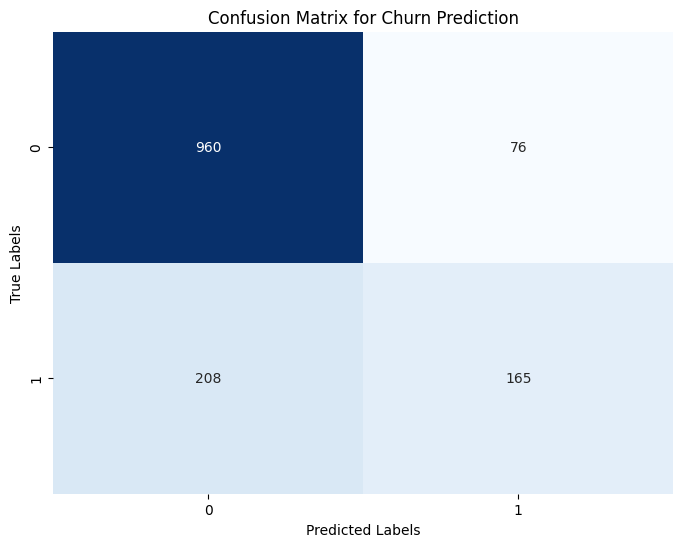

In [21]:
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Churn Prediction')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()